In [1]:
### Ce notebook reprend le notebook essai_juliette (pour éviter les conflits)

In [2]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#### On importe le fichier répertoriant les installations industrielles rejetant des polluants

import requests

# Téléchargement du fichier avec la localisation des installations industrielles rejetant des polluants, directement depuis le site Géorisques
url_industries_polluantes = "https://files.georisques.fr/irep/2023.zip"
response_industries_polluantes = requests.get(url_industries_polluantes)

# Enregistrement du fichier localement
with open("Industries_polluantes.xlsx", "wb") as f:
    f.write(response_industries_polluantes.content)

In [4]:
import pandas as pd
import zipfile

with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/etablissements.csv") as f:
        industries_polluantes = pd.read_csv(f, sep=None, engine='python')

# On renomme la colonne insee dès maintenant (pour harmoniser ensuite)
industries_polluantes = industries_polluantes.rename(columns={"code_insee" : "insee"})
industries_polluantes.head()


,identifiant,nom_etablissement,numero_siret,adresse,code_postal,insee,commune,code_departement,departement,code_region,region,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr
0,6101975,COFIBEX,43425026200012,AVENUE DE LA LIBERATION ZONE INDUSTRIELLE,1500,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.33551,45.96163,4326.0,6420Z,Activités des sociétés holding,NaN,NaN
1,9000321,AIA Ambrieu en Bugey,15000028900135,avenue du colonel CHAMBONNET Base arienne 278,1508,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34592,45.97117,4326.0,8422Z,Défense,NaN,NaN
2,6100021,THIERRY DANNENMULLER TRANSPORTS LOCATIONS TRAV...,35234119200065,LE PELOUX CARRIERE D'AMBRONAY LE PELOUX,1500,01007,AMBRONAY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34282,46.02817,4326.0,0811Z,Extraction de pierres ornementales et de const...,NaN,NaN
3,3202489,SOCIETE BRESSANE DE STOCKAGE ET DE CHARGEMENT,34408383700015,GARE,1500,01007,AMBRONAY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.35873,46.00535,4326.0,5224B,Manutention non portuaire,NaN,NaN
4,6101980,FERROGLOBE FRANCE,64200517700265,ROUTE DE LA GARE,1350,01010,ANGLEFORT,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.81144,45.90610,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...


In [5]:
with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/rejets.csv") as f:
        rejets = pd.read_csv(f, sep=None, engine='python')

rejets = rejets.rename(columns = {"code_insee" : "insee"})

rejets.head()

,identifiant,nom_etablissement,code_postal,insee,commune,code_departement,departement,code_region,region,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,3012489,CARRIERES & MATERIAUX NORD-EST,51150,51303,JALONS,51,MARNE,44,GRAND-EST,2023,NaN,167850.0
1,3012512,ETABLISSEMENTS BLANDIN SA,51300,51433,PLICHANCOURT,51,MARNE,44,GRAND-EST,2023,NaN,59277.0
2,3012705,KNAUF INSULATION LANNEMEZAN,57970,57343,ILLANGE,57,MOSELLE,44,GRAND-EST,2023,0.0,0.0
3,3013146,METABOLIC EXPLORER,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,55597.0,NaN
4,3014130,AFYREN NEOXY,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,7647.0,NaN


In [6]:
# on merge les deux tables
etablissements_rejets = pd.merge(industries_polluantes, rejets, on=["identifiant", "nom_etablissement", "code_postal", "insee",
"commune", "code_departement", "departement", "code_region", "region"], how="inner")
etablissements_rejets.head()

,identifiant,nom_etablissement,numero_siret,adresse,code_postal,insee,commune,code_departement,departement,code_region,...,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,6101980,FERROGLOBE FRANCE,64200517700265,ROUTE DE LA GARE,1350,01010,ANGLEFORT,01,AIN,84.0,...,5.81144,45.90610,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...,2023,NaN,2253116.0
1,6101989,KEM ONE,53869504000039,258 ROUTE DE SAINT MAURICE DE GOURDANS SITE IN...,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2014Z,Fabrication d'autres produits chimiques organi...,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,685463.0
2,6112329,SK FUNCTIONAL POLYMER,87995793400059,258 ROUTE DE ST MAURICE DE GOURDANS,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2016Z,Fabrication de matières plastiques de base,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,94045.0
3,6108136,ELIAN,76020009700060,570 RUE DE L'ANGE ZI SUD PLASTICS VALLEE BP5,1100,01031,BELLIGNAT,01,AIN,84.0,...,5.62876,46.24919,4326.0,2012Z,Fabrication de colorants et de pigments,NaN,NaN,2023,1866.0,NaN
4,6102002,SYND INTERCOMMUNAL DE VALORISATION,25740162000030,5 CHEMIN DE TAPEY ZI D ARLOD,1200,01033,BELLEGARDE-SUR-VALSERINE,01,AIN,84.0,...,5.81411,46.08494,4326.0,3821Z,Traitement et élimination des déchets non dang...,5.(b),Installations destinées à l'incinération des d...,2023,NaN,25903484.0


In [82]:
#### Et on importe le fichier avec les shapefiles des communes

import requests

# Téléchargement du fichier avec les shapefiles des communes, directement depuis Datagouv
url_communes = "https://www.data.gouv.fr/api/1/datasets/r/0e117c06-248f-45e5-8945-0e79d9136165"
zip_communes = "shapefiles.zip"

# Enregistrement du fichier localement
response_communes = requests.get(url_communes)
with open(zip_communes, "wb") as f:
    f.write(response_communes.content)

# Importation avec GeoPandas
communes = gpd.read_file(f"zip://{zip_communes}!communes-20220101.shp")
communes.head()

,insee,nom,wikipedia,surf_ha,geometry
0,2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.3851, 9..."
1,2B137,Lano,fr:Lano,824.0,"POLYGON ((9.2001 42.39013, 9.20014 42.39014, 9..."
2,2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ..."
3,2B106,Érone,fr:Érone,393.0,"POLYGON ((9.2512 42.37605, 9.25132 42.37603, 9..."
4,2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.2834 42.66273, 9.28345 42.66273, 9..."


In [123]:
### Préparation du dataframe de travail

# On fait la jointure
df = pd.merge(communes, etablissements_rejets, on="insee", how = "inner")

# Conversion du fichier au format GeoPandas
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Création d'un dataframe avec seulement les communes polluées
communes_polluees = gdf.copy()
communes_polluees = communes_polluees[communes_polluees["insee"].isin(etablissements_rejets["insee"])]

# On crée un df avec les communes et une variable polluée ou non (binaire)
communes_statut = communes.copy()
communes_statut["Polluee"] = communes_statut["insee"].isin(communes_polluees["insee"])

# On regarde combien on en a (2 373 polluées parmi 34 955 : environ 7% (c'est bien !?))
print(communes_statut["Polluee"].sum(), communes.shape)

2373 (34955, 6)


In [ ]:
# On ajoute les colonnes de etablissements_rejets pour avoir plus d'informations sur l'industrie polluante au sein de la commune (quel niveau, où ?...)
communes_statut["coordonnees_x"] = np.nan
communes_statut.loc[communes_statut["Polluee"] == True, "coordonnees_x"] = etablissements_rejets["coordonnees_x"].values

In [87]:
communes_statut[communes_statut["Polluee"] == True].shape

(2373, 6)

In [91]:
etablissements_rejets["insee"].nunique()

2405

In [102]:
communes_statut["insee"] = communes_statut["insee"].astype(str)
etablissements_rejets["insee"] = etablissements_rejets["insee"].astype(str)

In [116]:
communes_statut[
    (communes_statut["Polluee"] == True)
    & (~communes_statut["insee"].isin(etablissements_rejets["insee"]))
].shape

(0, 6)

In [135]:
## On a un problème : les arrondissements ne sont pas décrits dans le fichier des communes (mais ils le sont dans etablissements_rejets)

# La preuve : 
set(etablissements_rejets["insee"].unique()) - set(communes_statut["insee"].unique())

# On obtient : la ville de Marseille, Montchauvet, Les Trois Lacs, Marcillac, Le Mesnil en vallée (et d'autres du 49), Diguleville (et d'autres du 50),
# La Rouge, Lyon, 74 (communes déléguées), Paris et Sainte-Florence
# Soit on fusionne, soit on supprime

{'14443',
 '27676',
 '33267',
 '49204',
 '49274',
 '49276',
 '50163',
 '50460',
 '50602',
 '61356',
 '74093',
 '74181',
 '85212'}

In [134]:
# Pour remédier à cela, on regroupe (provisoirement) les arrondissements ensemble dans le fichier etablissements_rejets
etablissements_rejets["insee"] = etablissements_rejets["insee"].replace(["13203", "13205", "13208", "13209", "13210", "13211", "13214", "13215", "13216"],
"13055")
etablissements_rejets["insee"] = etablissements_rejets["insee"].replace(["69383", "69384", "69387", "69388", "69389"],"69123")
etablissements_rejets["insee"] = etablissements_rejets["insee"].replace(["75101", "75109", "75111", "75112", "75115"],"75056")

In [126]:
communes_statut[communes_statut["departement"] == "13"]

,insee,nom,wikipedia,surf_ha,geometry,departement,Polluee
13685,13107,Simiane-Collongue,fr:Simiane-Collongue,3004.0,"POLYGON ((5.39283 43.41646, 5.394 43.41687, 5....",13,False
13686,13001,Aix-en-Provence,fr:Aix-en-Provence,18748.0,"POLYGON ((5.26947 43.49617, 5.26965 43.49648, ...",13,True
13687,13080,Le Puy-Sainte-Réparade,fr:Le Puy-Sainte-Réparade,4487.0,"POLYGON ((5.39213 43.64983, 5.39638 43.65622, ...",13,False
13905,13055,Marseille,fr:Marseille,24214.0,"MULTIPOLYGON (((5.22863 43.19774, 5.22866 43.1...",13,False
13933,13064,Mollégès,fr:Mollégès,1426.0,"POLYGON ((4.90858 43.81207, 4.91584 43.81248, ...",13,False
...,...,...,...,...,...,...,...
16326,13072,Peynier,fr:Peynier,2476.0,"POLYGON ((5.58757 43.44272, 5.58875 43.44513, ...",13,False
16327,13007,Auriol,fr:Auriol (Bouches-du-Rhône),4462.0,"POLYGON ((5.60689 43.37052, 5.60692 43.37061, ...",13,False
16328,13016,La Bouilladisse,fr:La Bouilladisse,1270.0,"POLYGON ((5.58188 43.40492, 5.58223 43.40497, ...",13,False
16329,13086,Roquevaire,fr:Roquevaire,2397.0,"POLYGON ((5.54614 43.34455, 5.54841 43.34434, ...",13,False


In [124]:
communes_statut.columns

Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry', 'departement',
       'Polluee'],
      dtype='object')

In [121]:
### On se concentre sur l'idf

# On crée un df communes seulement avec l'idf
communes["departement"] = communes["insee"].astype(str).str.slice(0,2)
communes_idf = communes.copy()
communes_idf = communes_idf[communes_idf["departement"].isin(["75", "77", "78", "91", "92", "93", "94", "95"])]

In [ ]:
# On crée un df avec les communes d'IDF et une variable polluée ou non (binaire)
communes_idf_statut = communes_idf.copy()
communes_idf_statut["Polluee"] = communes_idf["insee"].isin(communes_polluantes_idf["insee"])

# On regarde combien on en a (157 polluées parmi 1 268 : environ 10% (c'est cool !))
print(communes_idf_statut["Polluee"].sum(), communes_idf.shape)


Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry', 'Departement'], dtype='object') Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry', 'identifiant',
       'nom_etablissement', 'numero_siret', 'adresse', 'code_postal',
       'commune', 'code_departement', 'departement', 'code_region', 'region',
       'coordonnees_x', 'coordonnees_y', 'code_epsg', 'code_ape',
       'libelle_ape', 'code_eprtr', 'libelle_eprtr', 'annee_rejet',
       'rejet_raccorde_m3_par_an', 'rejet_isole_m3_par_an'],
      dtype='object')
157 (1268, 6)


In [21]:
communes_polluantes_idf.head()

,insee,nom,wikipedia,surf_ha,geometry,identifiant,nom_etablissement,numero_siret,adresse,code_postal,...,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
172,77486,Vaudoy-en-Brie,fr:Vaudoy-en-Brie,2764.0,"POLYGON ((3.04189 48.67036, 3.04342 48.67406, ...",6502906,VERMILION REP SAS,41096483700034,LES PRES DE LA COIGNEE CD 209,77141,...,3.10503,48.71433,4326.0,0610Z,Extraction de pétrole brut,NaN,NaN,2023,NaN,799.0
234,77133,Courcelles-en-Bassée,fr:Courcelles-en-Bassée,1080.0,"POLYGON ((3.01104 48.39662, 3.01107 48.39709, ...",6506565,CEMEX GRANULATS,55200596901090,LA MUETTE Carrire,77126,...,3.03391,48.40111,4326.0,0812Z,"Exploitation de gravières et sablières, extrac...",3.(b),Extraction à ciel ouvert et exploitation en ca...,2023,NaN,120.0
254,77357,Pécy,fr:Pécy,2112.0,"POLYGON ((3.02475 48.64634, 3.02475 48.64651, ...",6502212,CEMEX GRANULATS,55200596900589,CARRIERE,77970,...,3.09991,48.66022,4326.0,0812Z,"Exploitation de gravières et sablières, extrac...",NaN,NaN,2023,NaN,112.0
255,77357,Pécy,fr:Pécy,2112.0,"POLYGON ((3.02475 48.64634, 3.02475 48.64651, ...",6502209,CALCAIRES DE LA BRIE,34890910200017,Le Chauffour - RD 215 LE CHAUFOUR,77970,...,3.09991,48.65093,4326.0,0812Z,"Exploitation de gravières et sablières, extrac...",3.(b),Extraction à ciel ouvert et exploitation en ca...,2023,NaN,0.0
1174,77262,Louan-Villegruis-Fontaine,fr:Louan-Villegruis-Fontaine,3803.0,"POLYGON ((3.43772 48.60859, 3.44185 48.61177, ...",6519888,IMERYS LOUAN BARONNIE,49009659100246,Le chatelet,77560,...,3.52229,48.63915,4326.0,0812Z,"Exploitation de gravières et sablières, extrac...",NaN,NaN,2023,NaN,3919590.0


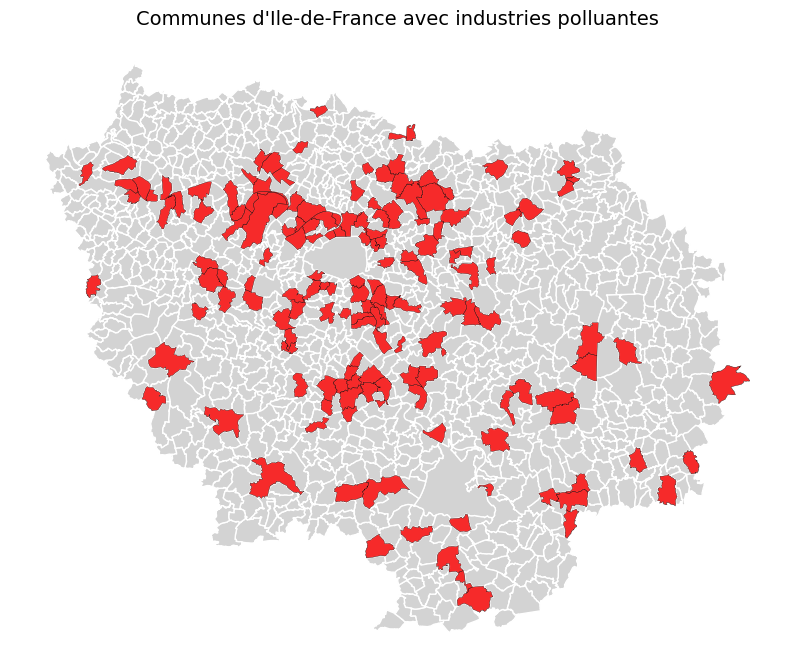

In [15]:
import matplotlib.pyplot as plt

# On s'assure qu'on a bien un GeoDataFrame et on charge l'epsg=2154
communes_idf_statut = gpd.GeoDataFrame(communes_idf_statut)
communes_idf_statut = communes_idf_statut.to_crs(epsg=2154)

# On crée le graphique
fig, ax = plt.subplots(figsize=(10, 10))

communes_idf_statut.plot(ax=ax, color='lightgrey', edgecolor='white')

communes_idf_statut[communes_idf_statut["Polluee"]].plot(
    ax=ax,
    color='red',
    edgecolor='black',
    linewidth=0.3,
    alpha=0.8
)

ax.set_title("Communes d'Ile-de-France avec industries polluantes", fontsize=14)
ax.axis('off')

plt.show()


In [16]:
#### On importe le dossier complet de l'INSEE pour apparier avec des données "sociales"

# On télécharge le dossier qui contient notre csv
url_complet = "https://www.insee.fr/fr/statistiques/fichier/5359146/dossier_complet.zip"
zip_path = "dossier_complet.zip" 

# On enregistre le fichier localement
response = requests.get(url_complet)
with open(zip_path, "wb") as f:
    f.write(response.content)

# On importe notre fichier avec Pandas (et on l'appelle complet_insee)
csv_complet_insee = "dossier_complet.csv" 
with zipfile.ZipFile(zip_path) as z:
    with z.open(csv_complet_insee) as f:
        complet_insee = pd.read_csv(f, sep=';', encoding='utf-8')

/tmp/ipykernel_43034/1042689086.py:16: DtypeWarning: Columns (0,1701,1702) have mixed types. Specify dtype option on import or set low_memory=False.
  complet_insee = pd.read_csv(f, sep=';', encoding='utf-8')


In [17]:
#### On fait à nouveau la jointure avec notre df précédent

# On renomme la variable CODGEO en "insee" pour que ce soit homogène
complet_insee = complet_insee.rename(columns={"CODGEO":"insee"})

# On s'assure que la variable "insee" est similaire dans les deux tableaux
communes_idf_statut['insee'] = communes_idf_statut['insee'].astype(str).str.zfill(5)                     # zfill remplit de zéros à gauche pour atteindre 5 signes (pour harmoniser à la norme INSEE)
complet_insee['insee'] = complet_insee['insee'].astype(str).str.zfill(5)

# On fusionne
communes_idf_complet = pd.merge(communes_idf_statut, complet_insee, on="insee") # on obtient un tableau à 1982 colonnes (et 1 267 lignes)
communes_idf_complet.shape


(1267, 1982)

In [18]:
#### Notre super gdf contient 1980 colonnes : on prend la pauvreté uniquement pour la visualiser
## NB : on pourra essayer avec beaucoup d'autres indicateurs plus tard !!!

# On ne retient que les variables d'intérêt
communes_idf_pauvrete = communes_idf_complet.copy()
communes_idf_pauvrete = communes_idf_pauvrete[['insee', 'nom', 'surf_ha', 'geometry', 'Departement', 'TP6021']]

# On renomme TP6021 en taux_pauvrete
communes_idf_pauvrete = communes_idf_pauvrete.rename(columns = {"TP6021" : "taux_pauvrete"})

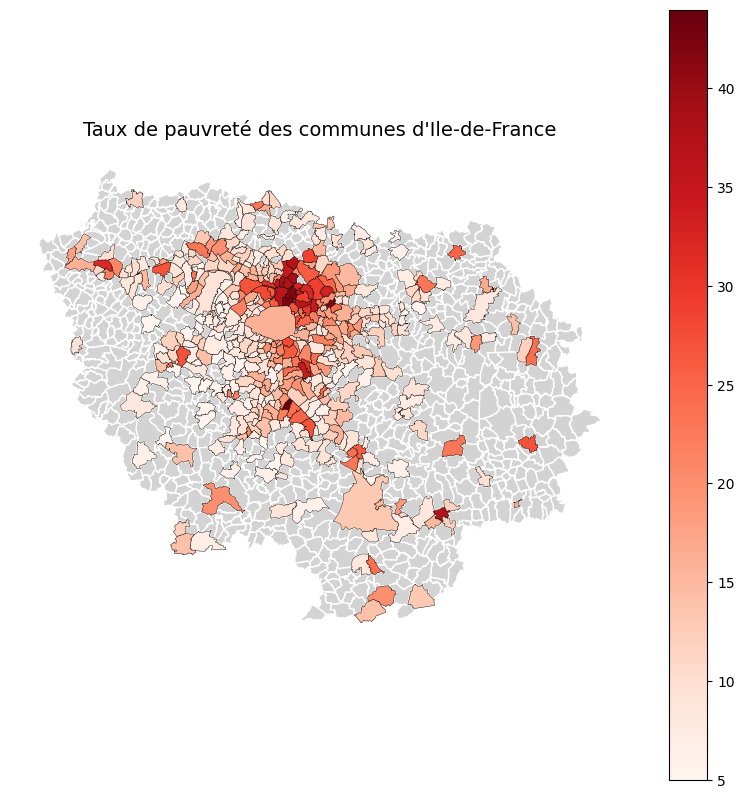

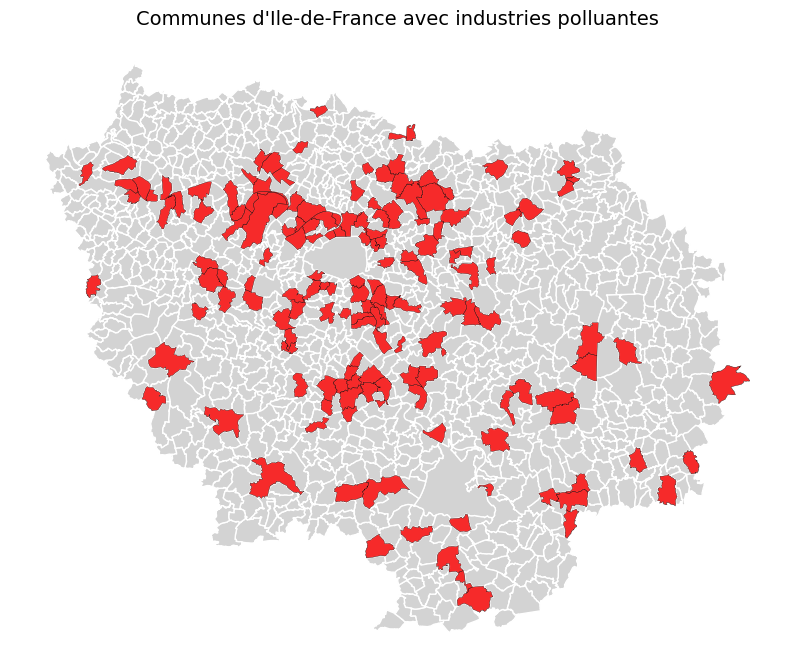

In [19]:
#### On visualise comme d'habitude

import re

# On s'assure qu'on a bien un GeoDataFrame 
communes_idf_pauvrete = gpd.GeoDataFrame(communes_idf_pauvrete)

# Nettoyage de la colonne taux_pauvrete
def clean_numeric(val):
    if val is None:
        return None
    val = str(val)
    val = re.sub(r'[^0-9\.,-]', '', val)  
    val = val.replace(',', '.')            
    try:
        return float(val)
    except:
        return None

communes_idf_pauvrete['taux_pauvrete'] = communes_idf_pauvrete['taux_pauvrete'].apply(clean_numeric)

# On charge l'epsg
communes_idf_pauvrete = communes_idf_pauvrete.to_crs(epsg=2154)

# On crée le graphique
fig, ax = plt.subplots(figsize=(10, 10))

communes_idf_pauvrete.plot(ax=ax, color='lightgrey', edgecolor='white')

communes_idf_pauvrete.plot(
    column="taux_pauvrete",
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.3,
    ax=ax
)

ax.set_title("Taux de pauvreté des communes d'Ile-de-France", fontsize=14)
ax.axis('off')

plt.show()

# On met en dessous le graphique sur la pollution
fig, ax = plt.subplots(figsize=(10, 10))
communes_idf_statut.plot(ax=ax, color='lightgrey', edgecolor='white')
communes_idf_statut[communes_idf_statut["Polluee"]].plot(
    ax=ax,
    color='red',
    edgecolor='black',
    linewidth=0.3,
    alpha=0.8
)
ax.set_title("Communes d'Ile-de-France avec industries polluantes", fontsize=14)
ax.axis('off')
plt.show()



In [20]:
### On voudrait tester tout ça !!

import numpy as np

# On crée un df avec le taux de pauvreté (si connu) et la pollution (variable binaire), et on le nettoie
communes_idf_pollution_pauvrete = communes_idf_complet.copy()
communes_idf_pollution_pauvrete = communes_idf_pollution_pauvrete[['insee', 'nom', 'surf_ha', 'geometry', 'Departement', 'TP6021', 'Polluee']]
communes_idf_pollution_pauvrete = communes_idf_pollution_pauvrete.rename(columns={"TP6021" : "taux_pauvrete"})
communes_idf_pollution_pauvrete["taux_pauvrete"] = communes_idf_pollution_pauvrete["taux_pauvrete"].replace("s", np.nan
).str.replace(",", ".", regex = False).astype(float)

# On construit un modèle de régression linéaire
from sklearn.linear_model import LinearRegression
reg_pauvrete_pollution = LinearRegression()
communes_idf_pollution_pauvrete = communes_idf_pollution_pauvrete.dropna(subset=["taux_pauvrete"])
reg_pauvrete_pollution.fit(communes_idf_pollution_pauvrete[["Polluee"]],communes_idf_pollution_pauvrete["taux_pauvrete"])
a = reg_pauvrete_pollution.coef_
b = reg_pauvrete_pollution.intercept_
print(a,b)

# On teste statistiquement la significativité par un t-test
from scipy.stats import ttest_ind
pauvrete_polluee = communes_idf_pollution_pauvrete.loc[communes_idf_pollution_pauvrete["Polluee"] == 1, "taux_pauvrete"]
pauvrete_non_polluee = communes_idf_pollution_pauvrete.loc[communes_idf_pollution_pauvrete["Polluee"] == 0, "taux_pauvrete"]
t_stat, p_value = ttest_ind(pauvrete_polluee, pauvrete_non_polluee, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3e}")

[4.64325221] 12.044247787610619
t-statistic: 5.317, p-value: 2.937e-07
